# Predict Diabetes progression over a year - ml project

## Data Loading and Preparation:
•The code starts by importing necessary libraries including numpy, pandas, matplotlib, seaborn, and scikit-learn modules.

•It loads the diabetes dataset using scikit-learn's load_diabetes() function, which provides a dataset with ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements for 442 diabetes patients.

•The dataset is then converted into a pandas DataFrame for easier manipulation and analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go


In [ ]:
# Load the diabetes dataset
diabetes_data = load_diabetes()

# Create a DataFrame
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Data Exploration and Visualization:
•Check if there is any missing value.

•Use box plots to visuale the distribution of each feature and detect outliers, because outliers can significantly affect the performance. In this case the outliers are mild so we dont have to handle it.

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

In [ ]:
# Detect outliers using box plots
plt.figure(figsize=(15, 6))
for i, feature in enumerate(diabetes_data.feature_names):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


A correlation matrix is calculated and visualized as a heatmap to understand the relationships between different features. This helps in identifying potential multicollinearity issues, which could affect the performance of linear models.

In [76]:
# Calculate correlation matrix
correlation_matrix = df.corr()

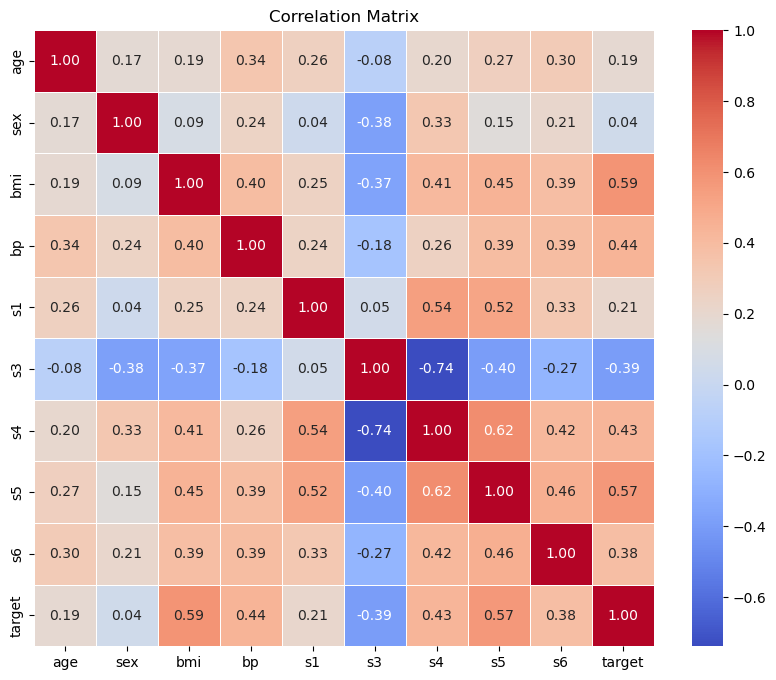

In [77]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data preprocessing and Feature Scaling:

•s1 and s2 variable have 0.90 correlation coefficent, so i get rid of s2 column due to redundancy.

•The data is split into training and testing sets using the train_test_split() function from scikit-learn. This allows for evaluating the performance of the trained models on unseen data.

In [61]:
df = df.drop(columns=["s2"])

In [62]:
# Split the data into training and testing sets
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)
X_train.shape

(296, 9)

•Standardization ensures that each feature has a mean of 0 and a standard deviation of 1, which can help improve the convergence of certain machine learning algorithms, such as SVMs and LinearRegression.

In [63]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training and Hyperparameter Tuning:

•Several regression models are defined, including Support Vector Machine (SVR), Random Forest Regressor, Gradient Boosting Regressor, and Linear Regression.

•Hyperparameter grids are defined for each model, specifying the parameters to be tuned during the grid search cross-validation process.

In [64]:
# Define models
svm_model = SVR()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

In [65]:
# Define hyperparameter grids
svm_param_grid = {'C': [0.1, 1, 10, 100]}
rf_param_grid = {'n_estimators': [50, 100, 150]}
gb_param_grid = {'n_estimators': [50, 100, 150]}

•Grid search cross-validation is performed for each model to find the best combination of hyperparameters that maximizes the R-squared score (coefficient of determination) on the training data.

In [66]:
# Perform grid search cross-validation for each model
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='r2')
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='r2')
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='r2')

In [67]:
# Fit the grid search objects to find the best hyperparameters
svm_grid_search.fit(X_train_scaled, y_train)
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'n_estimators': [50, 100, 150]}, scoring='r2')

In [79]:
# Get the best hyperparameters
best_svm_params = svm_grid_search.best_estimator_.get_params()
best_rf_params = rf_grid_search.best_estimator_.get_params()
best_gb_params = gb_grid_search.best_estimator_.get_params()

## Model Evalutaion:

•Models are trained using the best hyperparameters found during the grid search.

•Predictions are made on the test set using each trained model.

•R-squared scores are calculated to evaluate the performance of each model on the test set.

In [83]:
# Train models with best hyperparameters
best_svm_model = SVR(**best_svm_params)
best_rf_model = RandomForestRegressor(**best_rf_params)
best_gb_model = GradientBoostingRegressor(**best_gb_params)

best_svm_model.fit(X_train_scaled, y_train)
best_rf_model.fit(X_train, y_train)
best_gb_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [84]:
# Make predictions on the test set
svm_pred = best_svm_model.predict(X_test_scaled)
rf_pred = best_rf_model.predict(X_test)
gb_pred = best_gb_model.predict(X_test)
lr_model.fit(X_train, y_train)
lr_test_pred = lr_model.predict(X_test)

In [85]:
# Calculate and print the R^2 score on the test set for each model
print('Coefficient of determination for support vector machine: %.2f' % r2_score(y_test, svm_pred))
print('Coefficient of determination RandomForestRegressors: %.2f' % r2_score(y_test, rf_pred))
print('Coefficient of determination GradientBoostRegressor: %.2f' % r2_score(y_test, gb_pred))
print('Coefficient of determination Linearegression: %.2f' % r2_score(y_test, lr_test_pred))



Coefficient of determination for support vector machine: 0.53
Coefficient of determination RandomForestRegressors: 0.48
Coefficient of determination GradientBoostRegressor: 0.52
Coefficient of determination Linearegression: 0.60


# Conclusion:
In this case LinearRegression is the best model bases on R2 score with 0.60, and RandomForestRegressor is the worst with 0.48.